__IMPORTING NECESSARY LIBARIES__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__EDA ON FALCON9 DATASET__

In [2]:
data_falcon9 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

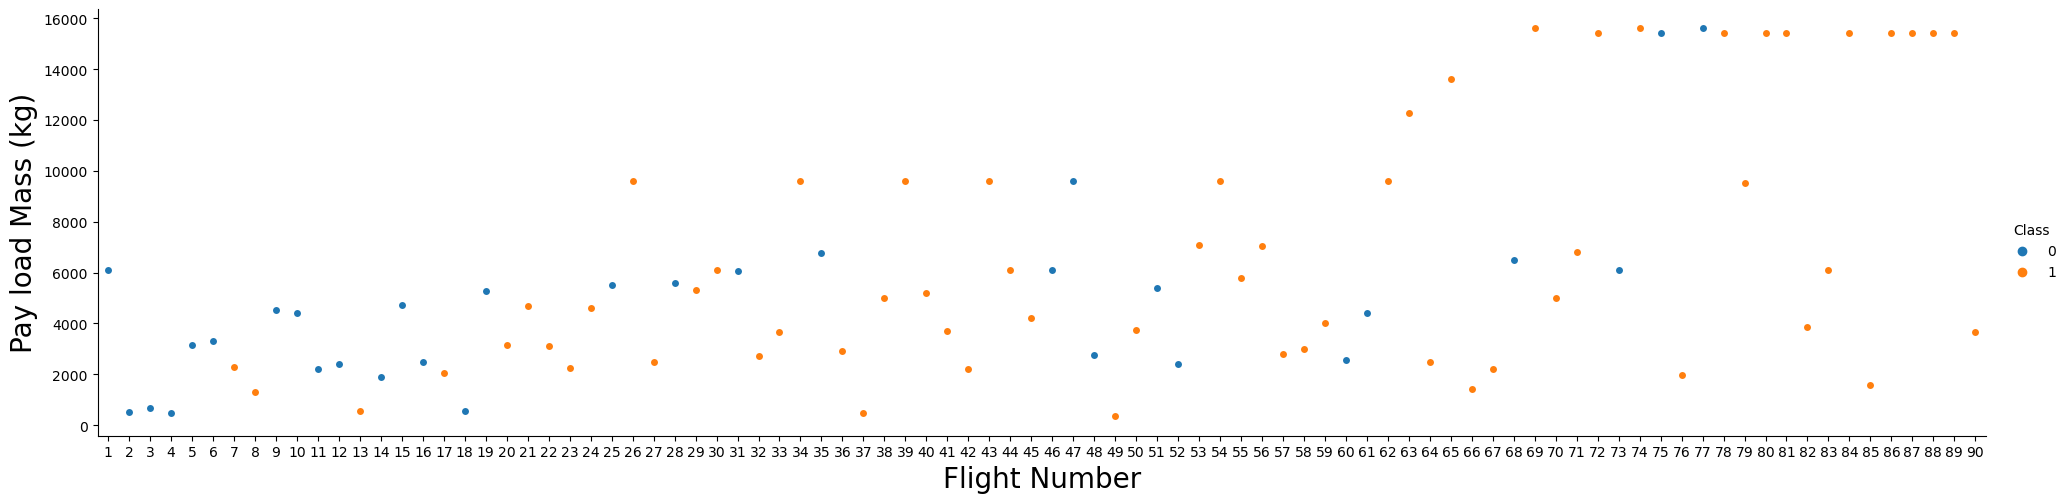

In [3]:
sns.catplot(data = data_falcon9, x = 'FlightNumber', y = 'PayloadMass', hue= "Class", aspect = 4)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Pay load Mass (kg)",fontsize = 20)
plt.show()

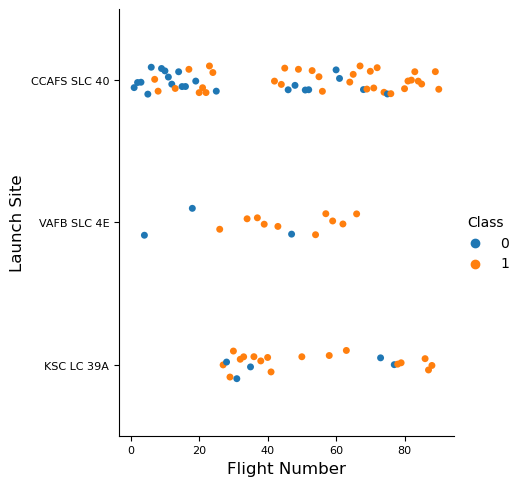

In [4]:
#TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(data = data_falcon9, x = 'FlightNumber', y = 'LaunchSite', hue = 'Class')
plt.xlabel('Flight Number', fontsize = 12)
plt.ylabel('Launch Site', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 8)
plt.show()

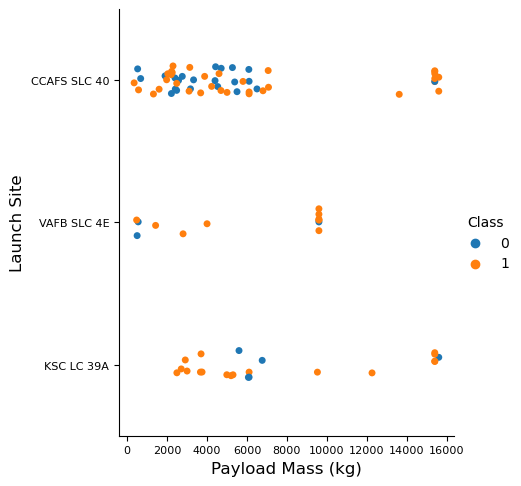

In [5]:
# TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(data = data_falcon9, x = 'PayloadMass', y = 'LaunchSite', hue = 'Class')
plt.xlabel('Payload Mass (kg)', fontsize = 12)
plt.ylabel('Launch Site', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 8)
plt.show()

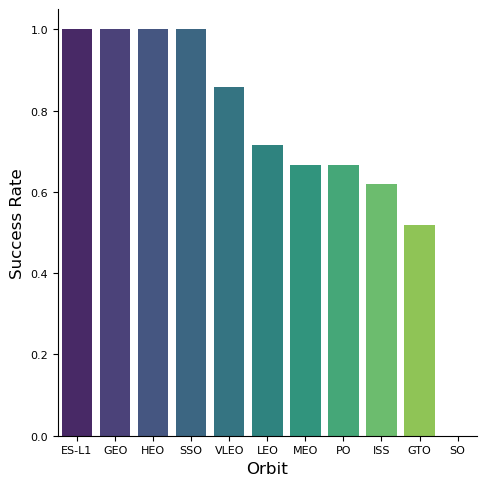

In [6]:
# TASK  3: Visualize the relationship between success rate of each orbit type
orbit_barchart = pd.DataFrame(data_falcon9.groupby('Orbit')['Class'].mean()).sort_values('Class', ascending = False)
orbit_barchart.reset_index(inplace = True)
sns.catplot(kind = 'bar', data = orbit_barchart, x = 'Orbit', y = 'Class', palette = 'viridis')
plt.xlabel('Orbit', fontsize = 12)
plt.ylabel('Success Rate', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 8)
plt.show()

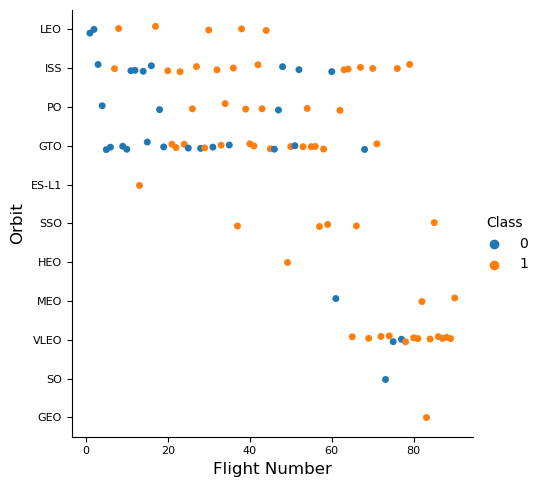

In [7]:
# TASK  4: Visualize the relationship between FlightNumber and Orbit type
sns.catplot(data = data_falcon9, x = 'FlightNumber', y = 'Orbit', hue = 'Class')
plt.xlabel('Flight Number', fontsize = 12)
plt.ylabel('Orbit', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 8)
plt.show()

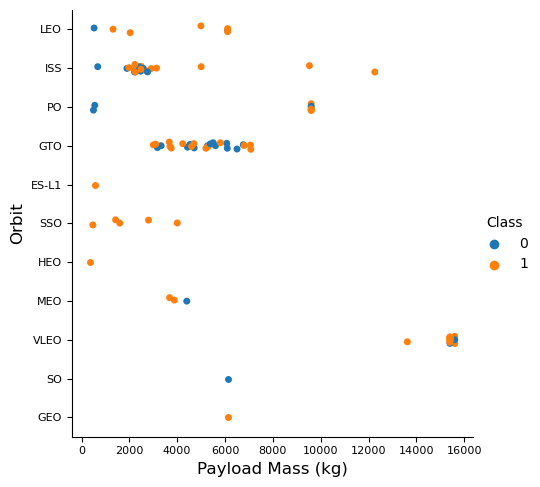

In [8]:
# TASK  5: Visualize the relationship between Payload and Orbit type
sns.catplot(data = data_falcon9, x = 'PayloadMass', y = 'Orbit', hue = 'Class')
plt.xlabel('Payload Mass (kg)', fontsize = 12)
plt.ylabel('Orbit', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 8)
plt.show()

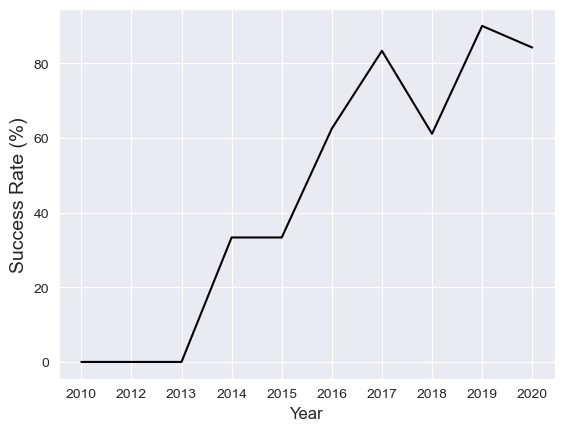

In [9]:
# TASK  6: Visualize the launch success yearly trend
year = []

for i in data_falcon9['Date']:
    year.append(i.split('-')[0])
    
data = {'Year': year}
task6_df = pd.DataFrame(data, columns = ['Year'])
task6_df['Class'] = data_falcon9['Class'] * 100
task6_df_groupby = pd.DataFrame(task6_df.groupby('Year')['Class'].mean())
task6_df_groupby.reset_index(inplace = True)

sns.set_style('darkgrid')
sns.lineplot(data = task6_df_groupby, x = 'Year', y = 'Class', color = 'black')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Success Rate (%)', fontsize = 14)
plt.tick_params(axis = 'both', labelsize = 10)
plt.show()

In [10]:
features = data_falcon9[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins',
                         'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [11]:
features_one_hot = pd.get_dummies(features, columns = ["Orbit","LaunchSite","LandingPad","Serial"])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
features_one_hot = features_one_hot.astype("float64")
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object